<a href="https://colab.research.google.com/github/Rohan5076/machine-learning/blob/main/ML_15_Advanced_Ensemble_Techniques(Stacking).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stacking**

Stacking is a way to ensemble multiple classifications or regression model. There are many ways to ensemble models, the widely known models are Bagging or Boosting. Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small.

Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model. Then you add a new model which learns from the intermediate predictions the same target.

This final model is said to be stacked on the top of the others, hence the name. Thus, you might improve your overall performance, and often you end up with a model which is better than any individual intermediate model. Notice however, that it does not give you any guarantee, as is often the case with any machine learning technique.

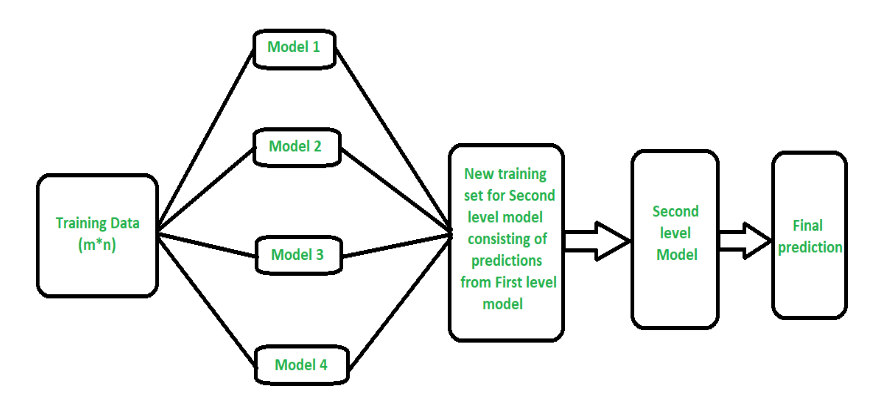

## How stacking works?

1. We split the training data into K-folds just like K-fold cross-validation.
2. A base model is fitted on the K-1 parts and predictions are made for Kth part.
3. We do for each part of the training data.
4. The base model is then fitted on the whole train data set to calculate its performance on the test set.
5. We repeat the last 3 steps for other base models.
6. Predictions from the train set are used as features for the second level model.
7. Second level model is used to make a prediction on the test set.

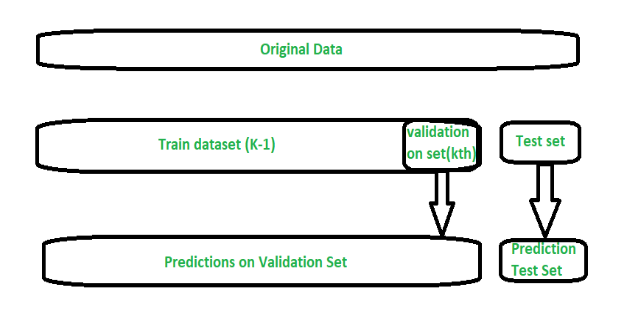

## 1. Stacking - Explained Again
Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. Below is a step-wise explanation for a simple stacked ensemble:

### step 1: The train set is split into 10 parts.

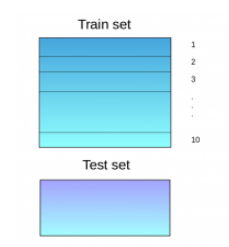


### step 2: A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.

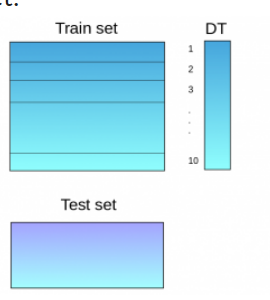

### step 3: The base model (in this case, decision tree) is then fitted on the whole train dataset.
### step 4: Using this model, predictions are made on the test set.

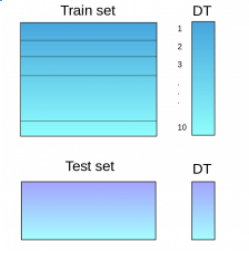

### Step 5: Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.

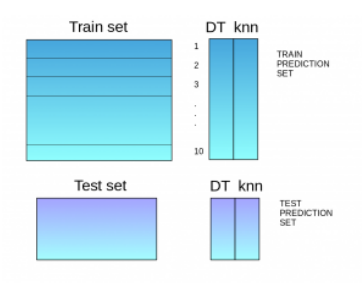

### Step 6: The predictions from the train set are used as features to build a new model.
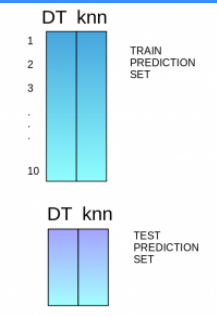

### Step 7: This model is used to make final predictions on the test prediction set.


## Sample code:

We first define a function to make predictions on n-folds of train and test dataset. This function returns the predictions for train and test for each model.

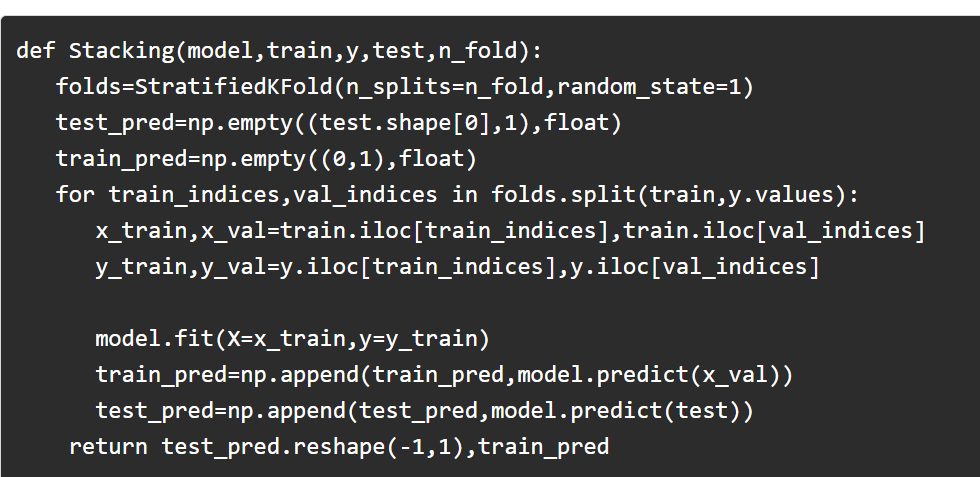

Now we’ll create two base models – decision tree and knn.



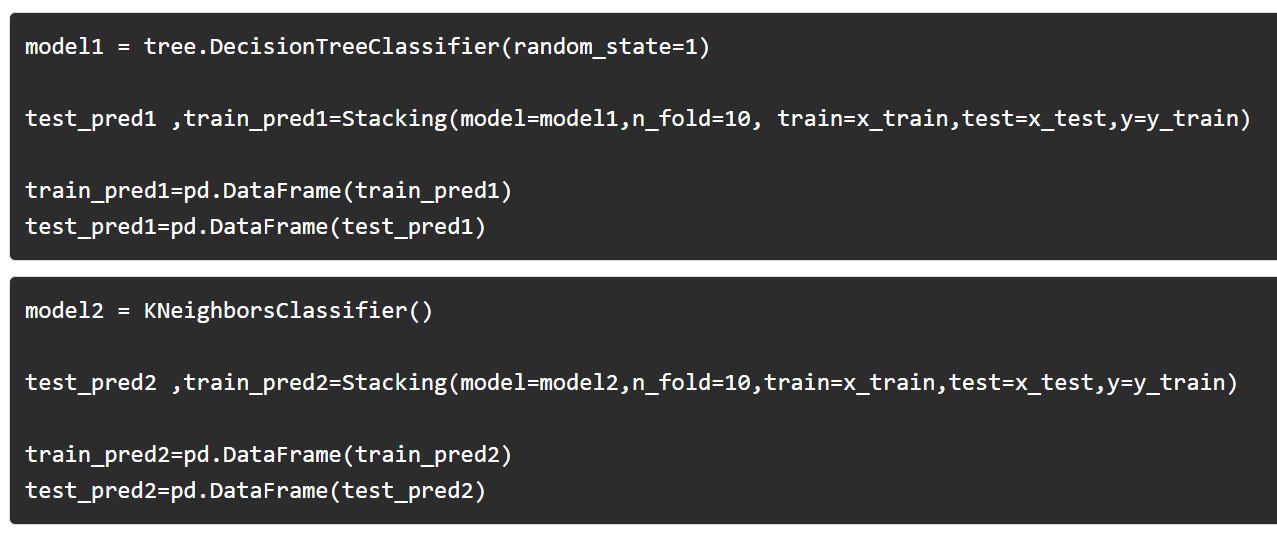

Create a third model, logistic regression, on the predictions of the decision tree and knn models.



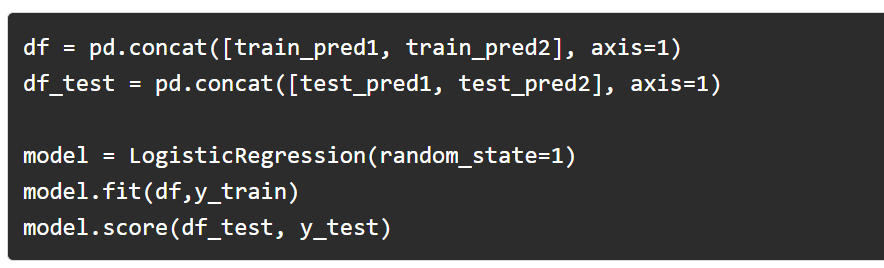

In order to simplify the above explanation, the stacking model we have created has only two levels. The decision tree and knn models are built at level zero, while a logistic regression model is built at level one. Feel free to create multiple levels in a stacking model.

In [6]:
!pip install pandas 
!pip install -U scikit-learn
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#loading the data set
df = pd.read_csv("/content/drive/MyDrive/All CSV files-20220711T101939Z-001/All CSV files/wheatseeds.csv")
df.head()

Area  Parameter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Aymmetery coefficient  length kernel groove  class(1,2,3)  
0                  2.221                 5.220             1  
1                  1.018                 4.956             1  
2                  2.699                 4.825             1  
3                  2.259                 4.805             1  
4                  1.355                 5.175             1

In [15]:
# Creating X and y for training
X = df.drop('class(1,2,3)', axis = 1)
y = df['class(1,2,3)']

In [16]:
# 20 % training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
df.columns

Index(['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove',
       'class(1,2,3)'],
      dtype='object')

In [18]:
#initializing sc object
sc = StandardScaler() 
# variables that needed to be transformed
var_transform = ['Area', 'Parameter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Aymmetery coefficient', 'length kernel groove']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])            # standardizing test data
print(X_train.head())

         Area  Parameter  Compactness  Length of kernel  Width of kernel  \
150 -1.053856  -1.040832    -0.888808         -0.861746        -1.130186   
96   1.529271   1.549570     0.463557          1.608780         1.462880   
200 -0.863920  -0.878932    -0.409757         -0.962584        -0.731870   
68  -0.176698  -0.146527     0.086251         -0.160465        -0.293454   
156 -1.223071  -1.318376    -0.464869         -1.343017        -1.106127   

     Aymmetery coefficient  length kernel groove  
150               1.035482             -0.223421  
96               -0.126599              1.690317  
200               1.222849             -0.761981  
68               -1.488222             -0.237810  
156              -0.214533             -0.848315  


In [19]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
NB = GaussianNB()              # initialising Naive Bayes

In [21]:
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset

In [22]:
acc_knc = accuracy_score(y_test, pred_knc) # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knc * 100)


accuracy score of KNeighbors Classifier is: 88.09523809523809


In [23]:
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)


In [24]:
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)


Accuracy of Naive Bayes Classifier: 85.71428571428571


In [25]:
lr = LogisticRegression() # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[KNC, NB], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)


In [26]:
model_stack = clf_stack.fit(X_train, y_train) # training of stacked model
pred_stack = model_stack.predict(X_test)	 # predictions on test data using stacked model


In [27]:
acc_stack = accuracy_score(y_test, pred_stack) # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)


accuracy score of Stacked model: 88.09523809523809


In [28]:
model_stack = clf_stack.fit(X_train, y_train) # training of stacked model
pred_stack = model_stack.predict(X_test)	 # predictions on test data using stacked model


In [29]:
acc_stack = accuracy_score(y_test, pred_stack) # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)


accuracy score of Stacked model: 88.09523809523809
